In [1]:
from artificialmap.elements import EnvironmentElement
from artificialmap.model import Model

# Creating element directly using EnvironmentElement class
### Firstly, we should define a function which will be our model

In [2]:
def hill(i, j):
    return -0.4*(i**2 + j**2) + 10

### Next, we create an instance of Model class

In [3]:
model_hill = Model(model=hill, central_position=(2, 4), under_ground=False)

### After that we can initialize new EnvironmentElement instance and observe the results

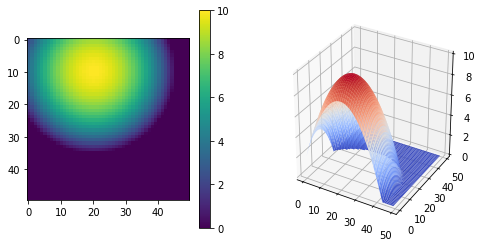

In [4]:
element = EnvironmentElement(size=(10, 10), resolution=5, model=model_hill)
element.generate_element_from_model().show()

As you can see above, the output matrix has dimensions 50x50 because input size was 10x10 with resolution 5. The center of model was placed where we'd indicated (center position is scalable by resolution too). `generate_element_from_model` method will return only matrix, when `matrix_only` is set on True.

### We can change the central position of the model, set its under_ground parameter on True...

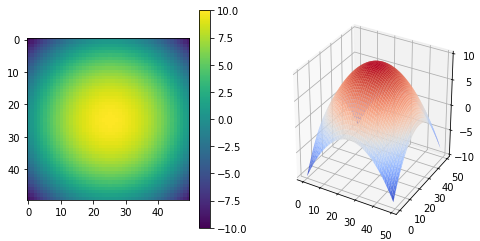

In [5]:
model_hill.central_position = (5, 5)
model_hill.under_ground=True
element.generate_element_from_model().show()

### ...or element's resolution

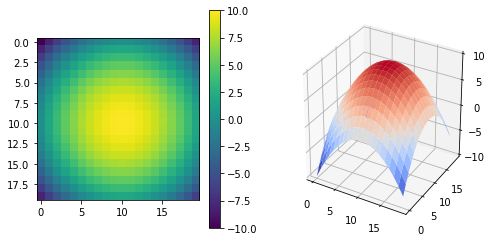

In [6]:
element.resolution = 2
element.generate_element_from_model().show()

You can find more details about `model` class in `examples` folder, file `models.ipynb`.


# Creating elements using `create_element` function
At the beginning we create two elements which have different internal models. Note that in this case you don't need to define functions as previously. Creating is done by `create_element` function which returns specific EnvironmentElement instance.

As you can see below, we have two elements: rounded hill and building with defined dimensions.

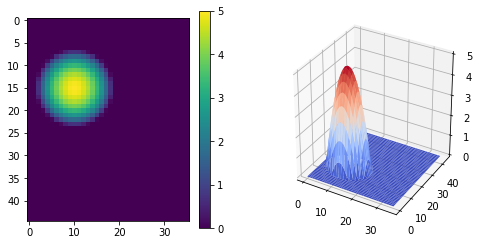

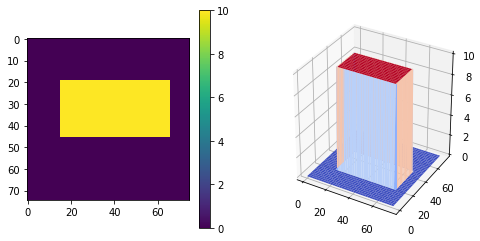

In [7]:
from artificialmap.elements import create_element

rounded_hill = create_element('rounded_hill', radius=5, height=15, size=(15, 12), central_position=(15, 10), resolution=3, in_resolution=True)
building = create_element('building', length=10, width=5, height=10, size=(15, 15), central_position=(6.5, 8), resolution=5, in_resolution=False)

rounded_hill.generate_element_from_model().show()
building.generate_element_from_model().show()

`in resolution` parameter allows us to choose the central position to be applied before scaling (`false` used in Building) or after (`false` used in RoundedHill).

First operation avaiable for `EnvironmentElement`'s class and its children is **merging**. Let's perform merge this two elements. Merging can be performed from both sides.

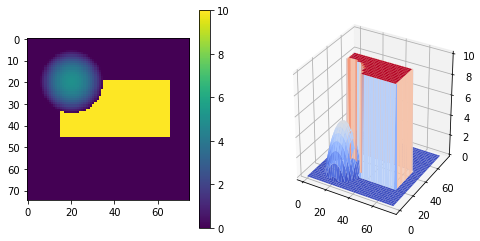

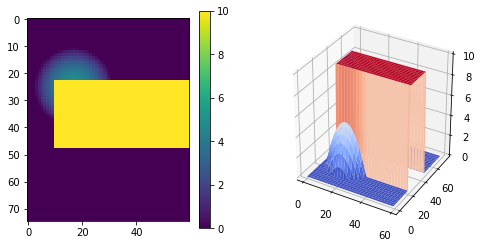

In [8]:
hill_merged_to_building = building.merge(other=rounded_hill, relative_position=(20, 20), in_resolution=True, replace=True, upsample=True)
hill_merged_to_building.generate_element_from_model().show()

building_merged_to_hill = rounded_hill.merge(other=building, relative_position=(21, 21), in_resolution=True, replace=True, upsample=True)
building_merged_to_hill.generate_element_from_model().show()


We merged two elements - rounded hill to building and in the next step, building to rounded hill. Note that `relative_position` parameter refers to (0, 0) matrix coordinates of element on which we invoke the `merge` method. At this position the center of other element is placed.

`upsample` parameter when set on `True` gives the highest resolution from both merged elements to returned element, lowest otherwise. 

It is worth mentioning that in case of second example above we had to change relative positon values to multiplicity of basic resolution of hill because we set `in_resolution=True` (the values have to be scaled down, placed in a proper place and then scaled up).

When `replace` parameter is set on `True`, corresponding value of element we invoke merge on will be replaced by value from other element.

When `bigger_values_only` is set on `True`, corresponding value of element we invoke merge on will be replaced by value from other element if this value will be bigger.

Both values will be added otherwise (when `replace` and `bigger_values_only` are set on False - these parameters are set on False by default).

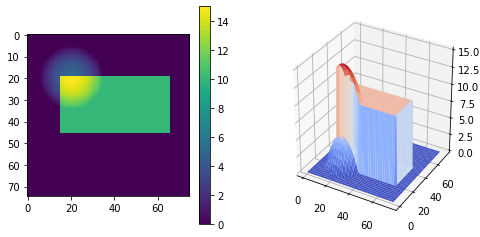

In [9]:
hill_merged_to_building = building.merge(other=rounded_hill, relative_position=(4, 4), in_resolution=False, upsample=True)
hill_merged_to_building.generate_element_from_model().show()

#List of available elements

1. RoundedHill

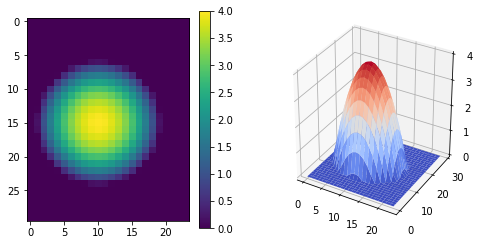

In [10]:
rounded_hill = create_element('rounded_hill', radius=4, height=3, size=(15, 12), central_position=(15, 10), resolution=2, in_resolution=True)
rounded_hill.generate_element_from_model().show()

2. Building

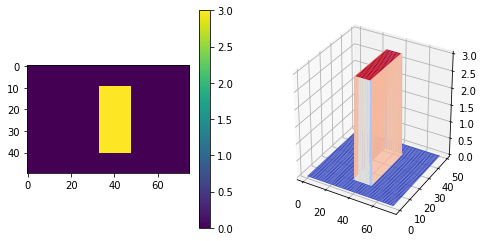

In [11]:
building = create_element('building', length=3, width=6, height=3, size=(10, 15), central_position=(25, 40), resolution=5, in_resolution=True)
building.generate_element_from_model().show()

3. EllipticHill

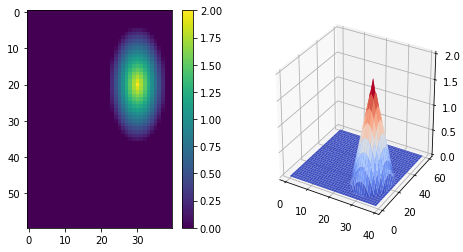

In [12]:
elliptic_hill = create_element('elliptic_hill', major_radius=4, minor_radius=8, height=2, size=(30, 20), central_position=(10, 15), resolution=2, in_resolution=False)
elliptic_hill.generate_element_from_model().show()

4. RoadElement

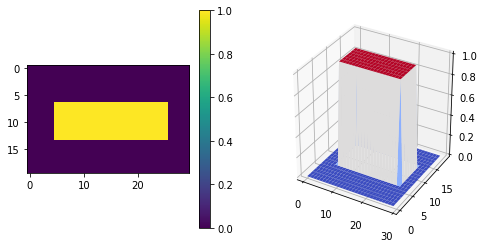

In [13]:
road_element = create_element('road_element', road_height=1, length=10, width=3, size=(10, 15), central_position=(10, 15), resolution=2, in_resolution=True)
road_element.generate_element_from_model().show()